# Kernel Density Estimation(Univariate)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import torch
from torch import nn, optim, distributions
import seaborn as sns
import KDEpy as kdp

Kernel Density Estimation is a density estimation method in statistics: it is a non parametric method for using a dataset to estimating probabilities for new points<br>

Kernel(K(.)): A kernel is a mathematical function that returns a probability for a given value of a random variable. The kernel effectively smooths or interpolates the probabilities across the range of outcomes such that the sum of probabilities equals one <br>

Bandwidth/smoothing parameter(h): Parameter that controls the number of samples or window of samples used to estimate the probability for a new point.<br>


$\hat{p}_n(x) = \frac{1}{nh} \sum_{i=1}^{n} K(\frac{X_i - x}{h})$<br>

A kernel function has features:<br>
(1): everywhere non-negative: $K(x) \geq 0$ for every $x$.<br>
(2): symmetric: $K(x) = K(-x)$ for every $x$.<br>
(3): $lim_{x \rightarrow -\infty} K(x) = lim_{x \rightarrow \infty} K(x) = 0$ <br>
(4): $\int K(x) dx = 1$<br>

Examples:<br>
Gaussian: $K(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{x^2}{2}}$<br>
Uniform: $K(x) = \frac{1}{2} I_{-1 \leq x \leq 1}$ <br>
Epanechnikov: $K(x) = \frac{3}{4} max\{1 - x^2, 0 \}$ <br>

When $h$ is too small, it can cause the undersmoothing. When $h$ is too large, it can cause oversmoothing.<br>


Bias of KDE: $E(\hat{p}_n(x_0) - p(x_0)) = \frac{1}{2}h^2 p^{''}(x_0)\mu_K + o(h^2).$. <br>
Variance of KDE: $Var(\hat{p}_n(x_0)) = \frac{1}{nh}p(x_0)\int K(x)^2 dx + o(\frac{1}{nh})$ <br>
Asymptotic Mean Square Error: $O(h^4) + O(\frac{1}{nh}).$<br>
With best $h$, the AMSE is $O(n^{-\frac{4}{5}})$(1 dimensional) $O(n^{-\frac{1}{4 + d}})$ for $d$ dimensions.

Kernel function $K$, bandwidth $h$, sample size $N$, and the norm $\| \|$ inside kernel function decide the effectiveness of KDE.$

Silverman's rule of thumb: data close to normal.<br>
Scott’s rule of thumb.<br>
Biased Cross Validation.<br>
Unbiased Cross Validation.<br>
Sheather & Jones method.<br>

# 1 Test

## 1.1 Generate Sample

In [29]:
Gamma_train = distributions.Gamma(4, 5, validate_args=None)
Gamma_train_sample = Gamma_train.sample(torch.Size([500]))
Gamma_test_sample = Gamma_train.sample(torch.Size([100]))
train_sample = (Gamma_train_sample.numpy()).reshape((500, 1))
test_sample = (Gamma_test_sample.numpy()).reshape((100,1))

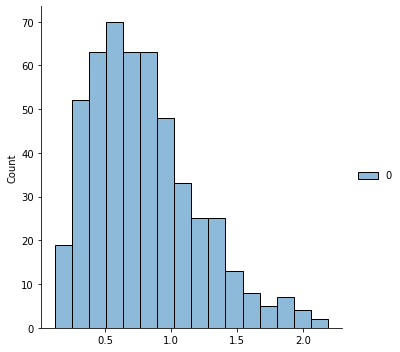

In [30]:
sns.displot(train_sample)

# 1.2 KDE example (Bandwidth = 0.01)

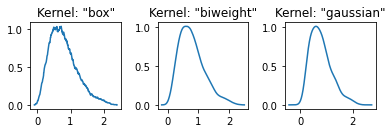

In [67]:
fig, axs = plt.subplots(1, 3)

for i, kernel in enumerate(['box', 'biweight', 'gaussian']):
    x, y = kdp.FFTKDE(kernel=kernel, bw='silverman').fit(train_sample).evaluate()
    axs[i].plot(x, y)
    axs[i].set_title(f'Kernel: "{kernel}"')
    
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.5, 
                    wspace=0.4, 
                    hspace=0.4)